In [59]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn

In [58]:
!python -m pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [60]:
# Load data

In [61]:
df = pd.read_csv("user_behavior_dataset.csv",
                low_memory=False)


In [62]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [63]:
df.tail()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1
699,700,OnePlus 9,Android,212,5.4,1306,49,828,23,Female,3


In [64]:
df.shape

(700, 11)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [66]:
# Check for missing values
df.isna().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [67]:
# Check for unique values in each column
df.nunique()

User ID                       700
Device Model                    5
Operating System                2
App Usage Time (min/day)      387
Screen On Time (hours/day)    108
Battery Drain (mAh/day)       628
Number of Apps Installed       86
Data Usage (MB/day)           585
Age                            42
Gender                          2
User Behavior Class             5
dtype: int64

In [68]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [69]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


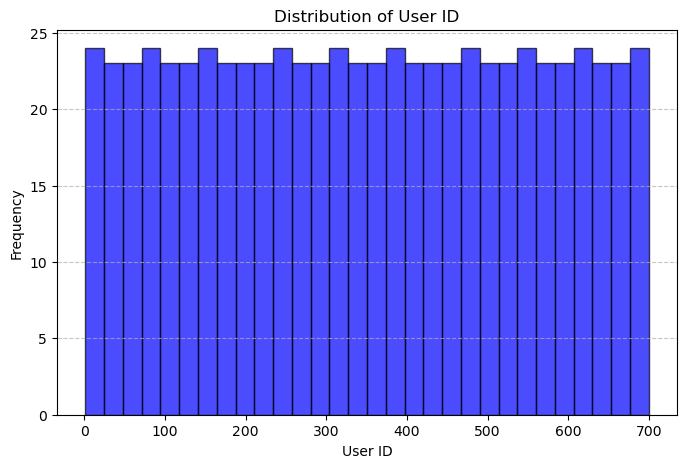

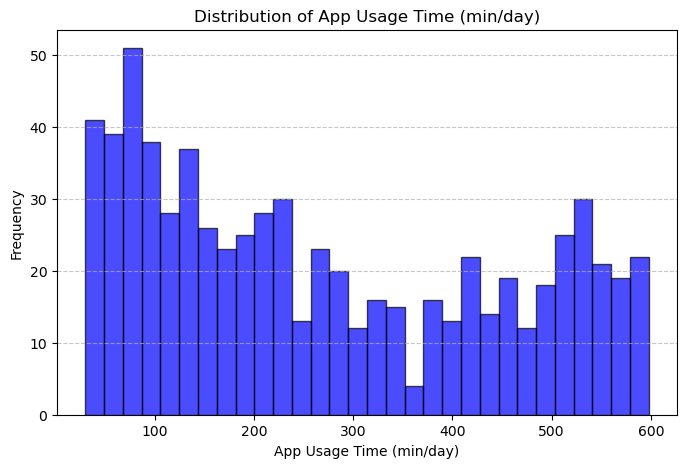

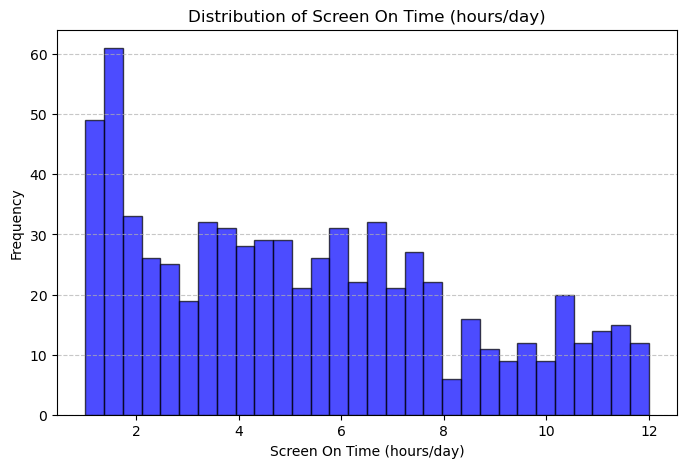

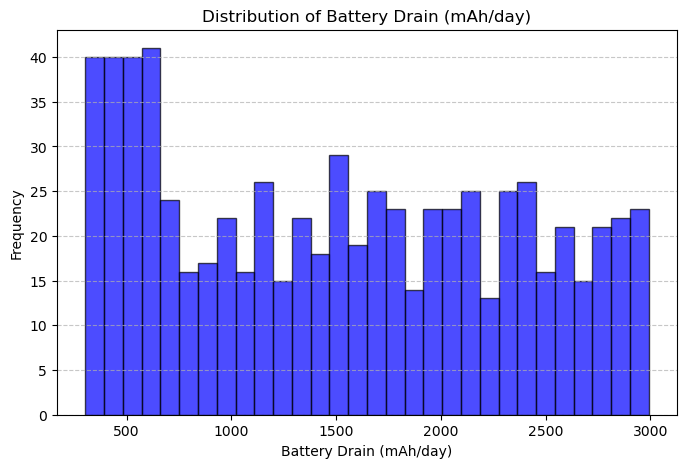

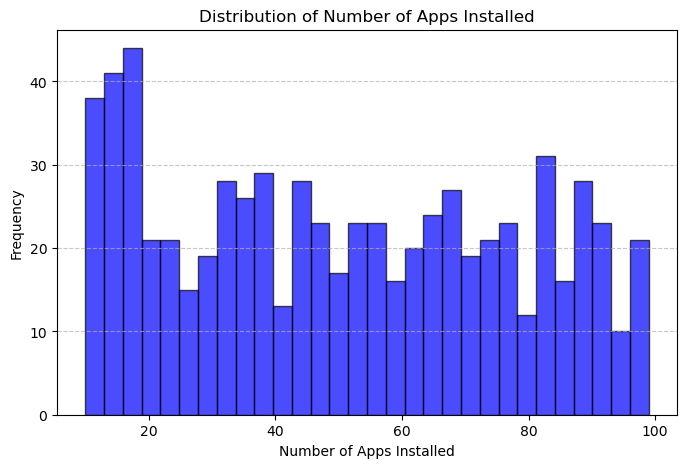

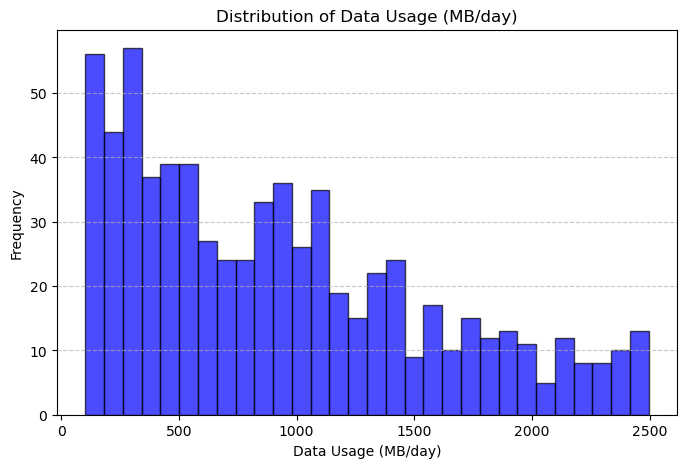

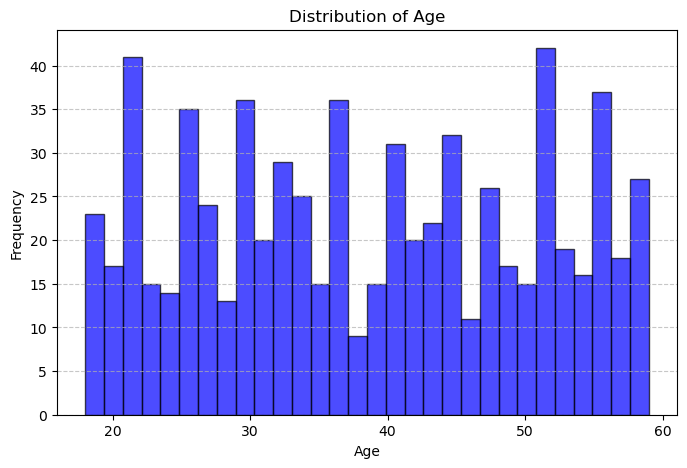

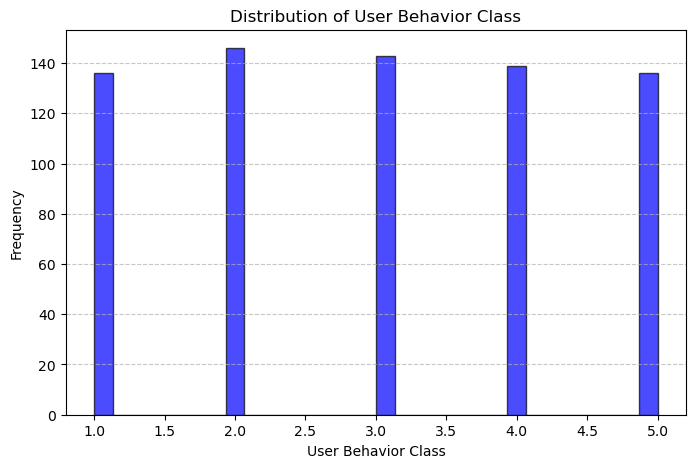

In [70]:
# Visualize distribution of numerical features
# Select numeric columns
%matplotlib inline
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Loop through numeric columns and create histograms
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

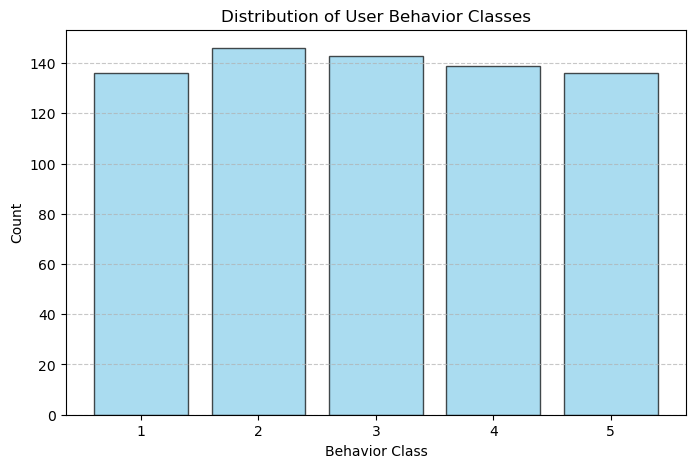

In [71]:

# user behavior classes distribution
class_column = 'User Behavior Class'

# Count the occurrences of each class
class_counts = df[class_column].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(class_counts.index, class_counts.values, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of User Behavior Classes")
plt.xlabel("Behavior Class")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [75]:
# for a correlation matrix
# Select only numerical columns
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Check the resulting dataframe
print(numerical_data.head())

   User ID  App Usage Time (min/day)  Screen On Time (hours/day)  \
0        1                       393                         6.4   
1        2                       268                         4.7   
2        3                       154                         4.0   
3        4                       239                         4.8   
4        5                       187                         4.3   

   Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
0                     1872                        67                 1122   
1                     1331                        42                  944   
2                      761                        32                  322   
3                     1676                        56                  871   
4                     1367                        58                  988   

   Age  User Behavior Class  
0   40                    4  
1   47                    3  
2   42                    2  
3   20  

In [76]:

# Compute the correlation matrix using only numerical data
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                             User ID  App Usage Time (min/day)  \
User ID                     1.000000                 -0.024957   
App Usage Time (min/day)   -0.024957                  1.000000   
Screen On Time (hours/day) -0.014287                  0.950333   
Battery Drain (mAh/day)    -0.019377                  0.956385   
Number of Apps Installed   -0.023914                  0.955253   
Data Usage (MB/day)        -0.014527                  0.942308   
Age                         0.045188                  0.004382   
User Behavior Class        -0.016242                  0.970498   

                            Screen On Time (hours/day)  \
User ID                                      -0.014287   
App Usage Time (min/day)                      0.950333   
Screen On Time (hours/day)                    1.000000   
Battery Drain (mAh/day)                       0.948983   
Number of Apps Installed                      0.946975   
Data Usage (MB/day)                           0.941322   

<Figure size 1000x800 with 0 Axes>

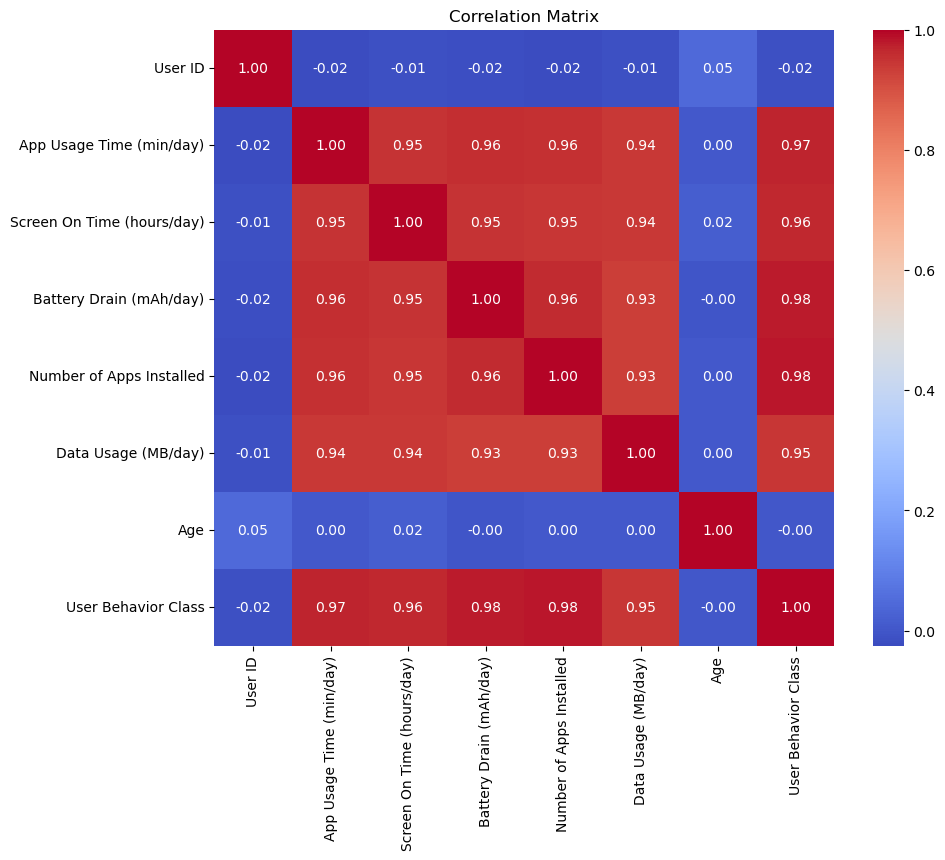

In [78]:
# Plot the heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [80]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [ ]:
# summary of the most popular devices based on user age

In [85]:

device_column = 'Device Model'  # Column for device names
age_column = 'Age'        # Column for user age

# Group by age and device, and count occurrences
device_popularity_by_age = df.groupby([age_column, device_column]).size().reset_index(name='Count')

# Sort by age and count to show the most popular devices for each age group
device_popularity_by_age = device_popularity_by_age.sort_values(by=[age_column, 'Count'], ascending=[True, False])

# Display the top devices for each age group
print(device_popularity_by_age)

     Age        Device Model  Count
1     18  Samsung Galaxy S21      4
0     18      Google Pixel 5      3
2     18        Xiaomi Mi 11      3
3     18           iPhone 12      1
7     19        Xiaomi Mi 11      4
..   ...                 ...    ...
199   59        Xiaomi Mi 11      4
200   59           iPhone 12      4
198   59  Samsung Galaxy S21      3
196   59      Google Pixel 5      1
197   59           OnePlus 9      1

[201 rows x 3 columns]


In [86]:
# most popular device for each age group:
# Get the top device for each age group
top_devices_by_age = device_popularity_by_age.loc[device_popularity_by_age.groupby(age_column)['Count'].idxmax()]

# Display the results
print(top_devices_by_age)

     Age        Device Model  Count
1     18  Samsung Galaxy S21      4
7     19        Xiaomi Mi 11      4
9     20      Google Pixel 5      5
17    21        Xiaomi Mi 11      6
23    22           iPhone 12      8
28    23           iPhone 12      5
30    24           OnePlus 9      6
33    25      Google Pixel 5      7
39    26           OnePlus 9      4
46    27        Xiaomi Mi 11      7
51    28        Xiaomi Mi 11      4
56    29           iPhone 12      6
57    30      Google Pixel 5      4
65    31        Xiaomi Mi 11      5
70    32        Xiaomi Mi 11      5
72    33      Google Pixel 5      6
80    34           iPhone 12      7
81    35      Google Pixel 5      5
86    36      Google Pixel 5      5
92    37           OnePlus 9      5
96    38      Google Pixel 5      3
102   39  Samsung Galaxy S21      5
105   40      Google Pixel 5      5
111   41           OnePlus 9      7
118   42        Xiaomi Mi 11      6
123   43        Xiaomi Mi 11      7
127   44  Samsung Galaxy S21

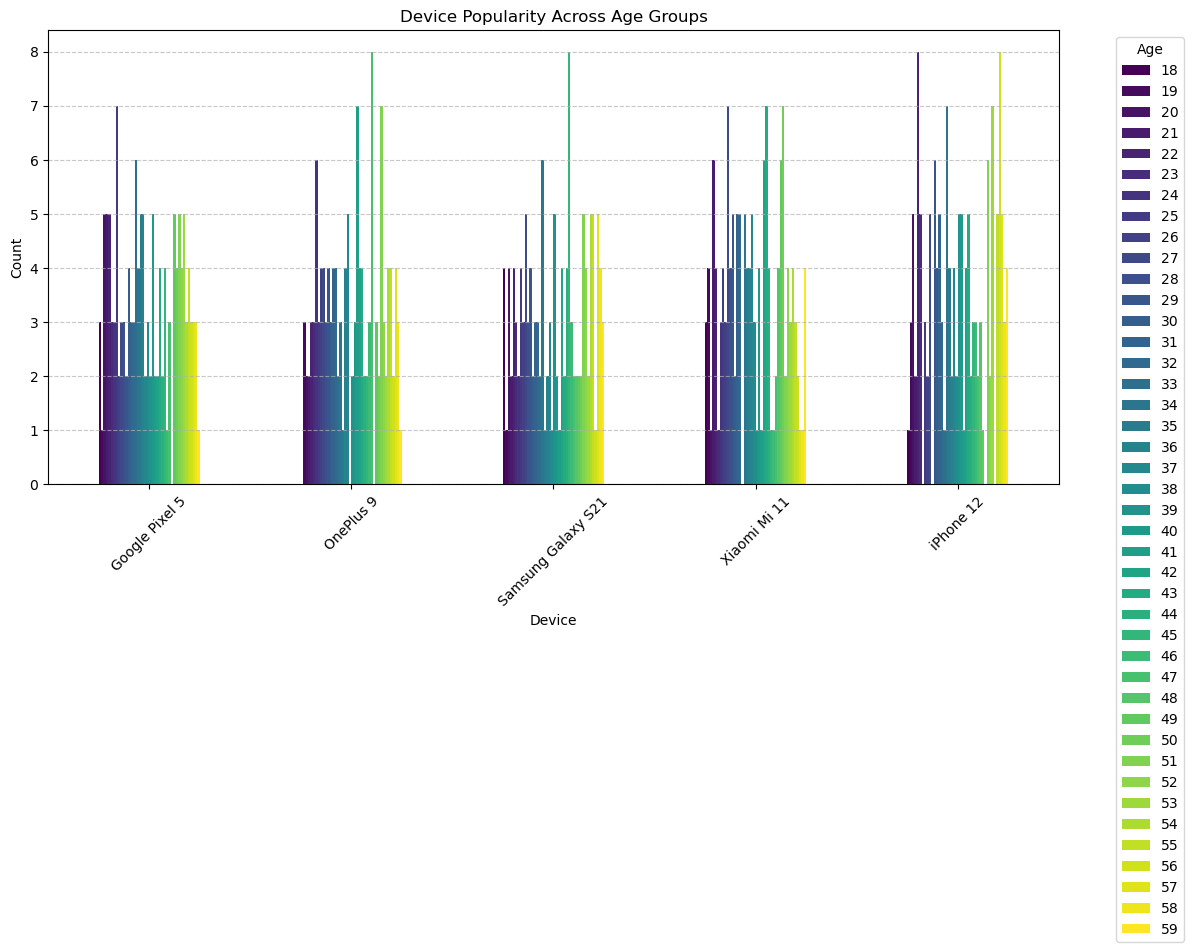

In [88]:
# Pivot the data for visualization
pivot_data = device_popularity_by_age.pivot(index=device_column, columns=age_column, values='Count').fillna(0)

# Plot the grouped bar chart
pivot_data.plot(kind='bar', figsize=(12, 8), stacked=False, colormap='viridis')

# Add labels and title
plt.title("Device Popularity Across Age Groups")
plt.xlabel("Device")
plt.ylabel("Count")
plt.legend(title="Age", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [83]:
### Display a summary of the most popular devices based on user age & gender.

In [81]:
# Replace column names as needed to match your dataset
device_column = 'Device Model'       # Column with device names (e.g., 'Google Pixel 5')
age_column = 'Age'             # Column with user age
gender_column = 'Gender'       # Column with user gender

# Group by device, age, and gender, and count occurrences
popularity_summary = df.groupby([device_column, age_column, gender_column]).size().reset_index(name='Count') # Groups the dataset by device, user age, and gender.

# Sort by count to show the most popular devices for each age and gender group
popularity_summary = popularity_summary.sort_values(by='Count', ascending=False)

# Display the top results
print(popularity_summary.head(10))

       Device Model  Age  Gender  Count
256    Xiaomi Mi 11   49  Female      6
333       iPhone 12   56    Male      6
125       OnePlus 9   51    Male      6
247    Xiaomi Mi 11   43  Female      5
329       iPhone 12   53    Male      5
246    Xiaomi Mi 11   42    Male      5
54   Google Pixel 5   51    Male      5
286       iPhone 12   27  Female      5
220    Xiaomi Mi 11   27  Female      5
30   Google Pixel 5   36  Female      5


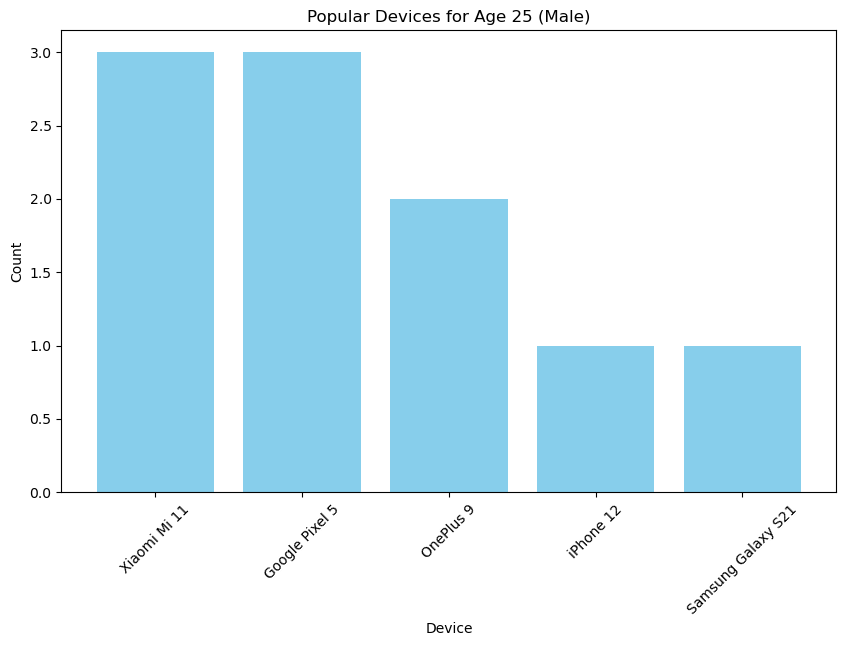

In [82]:
# Visualize our results
# Filter for a specific age group and gender (say a 25 year male)
age_group = 25
gender = 'Male'

filtered_summary = popularity_summary[(popularity_summary[age_column] == age_group) & 
                                      (popularity_summary[gender_column] == gender)]

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(filtered_summary[device_column], filtered_summary['Count'], color='skyblue')
plt.title(f"Popular Devices for Age {age_group} ({gender})")
plt.xlabel("Device")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()